# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [ ]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [ ]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [ ]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 2.1 s, sys: 8.08 ms, total: 2.11 s
Wall time: 2.26 s
Train ROC-AUC 0.9892
Valid ROC-AUC 0.9100
Test ROC-AUC 0.9145


## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

In [ ]:
train_score = []
test_score = []

depths = range(1, 30, 2)

for depth in depths:
    boosting = Boosting(base_model_params={'max_depth': depth})
    boosting.fit(x_train, y_train, x_valid, y_valid)
    train_score += [boosting.score(x_train, y_train)]
    test_score += [boosting.score(x_test, y_test)]

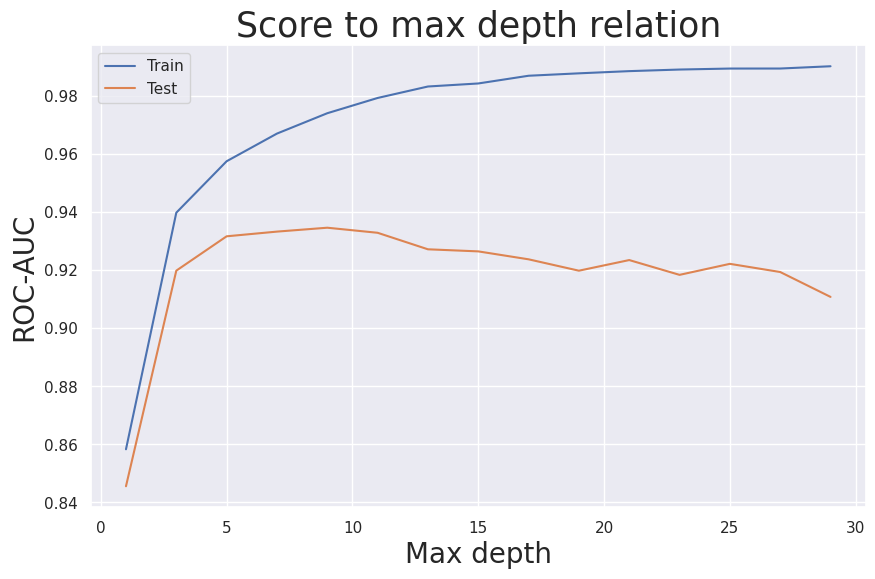

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)


ax.set_title('Score to max depth relation', fontsize=25)
ax.set_xlabel('Max depth', fontsize=20)
ax.set_ylabel('ROC-AUC', fontsize=20)

plt.plot(depths, train_score)
plt.plot(depths, test_score)

plt.legend(['Train', 'Test'])
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

**Ответ: Лучше всего выглядят модели с максимальной глубиной примерно от 5 до 10. Это сходится с теорией, что неглубокие деревья не переобучаются и правильная композиция из них дает низкое относительное смещение.**

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.2 MB/s eta 0:00:00


In [ ]:
from optuna import create_study


def objective_func(trial):
    max_depth = trial.suggest_int('max_depth', 1, 30, step=2)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20, log=True)

    n_estimators = trial.suggest_int('n_estimators', 1, 100, step=10)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)
    subsample = trial.suggest_float('subsample', 0.1, 1, step=0.1)
    early_stopping_rounds = trial.suggest_int('early_stopping_rounds', 10, 100, step=10)

    boosting = Boosting(base_model_params={'max_depth': max_depth,
                                           'min_samples_leaf': min_samples_leaf,
                                           'min_samples_split': min_samples_split},
                        n_estimators=n_estimators,
                        learning_rate=learning_rate,
                        subsample=subsample,
                        early_stopping_rounds=early_stopping_rounds)

    score = boosting.fit(x_train, y_train, x_valid, y_valid).score(x_valid, y_valid)
    return score

study = create_study(direction='maximize')
study.optimize(objective_func, n_trials=100)

[I 2023-12-21 20:43:37,660] A new study created in memory with name: no-name-f50d549d-5eec-4dbd-a7c3-f536591f15ce
[I 2023-12-21 20:44:18,200] Trial 0 finished with value: 0.9381122623685679 and parameters: {'max_depth': 25, 'min_samples_leaf': 20, 'min_samples_split': 3, 'n_estimators': 91, 'learning_rate': 0.011226369563953642, 'subsample': 0.8, 'early_stopping_rounds': 70}. Best is trial 0 with value: 0.9381122623685679.
[I 2023-12-21 20:44:33,837] Trial 1 finished with value: 0.9384091894131141 and parameters: {'max_depth': 11, 'min_samples_leaf': 16, 'min_samples_split': 2, 'n_estimators': 71, 'learning_rate': 0.0005053772862518861, 'subsample': 1.0, 'early_stopping_rounds': 50}. Best is trial 1 with value: 0.9384091894131141.
[I 2023-12-21 20:44:37,161] Trial 2 finished with value: 0.9388350243009244 and parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 14, 'n_estimators': 21, 'learning_rate': 0.01591352653118399, 'subsample': 0.5, 'early_stopping_rounds': 

In [ ]:
study.best_params

{'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 11,
 'n_estimators': 91,
 'learning_rate': 0.060964903059940734,
 'subsample': 0.2,
 'early_stopping_rounds': 80}

## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [ ]:
# взял функции из 4 дз

def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    plt.figure(figsize=(6,6))
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.ylim([-0.05, 1.05])
    plt.grid()

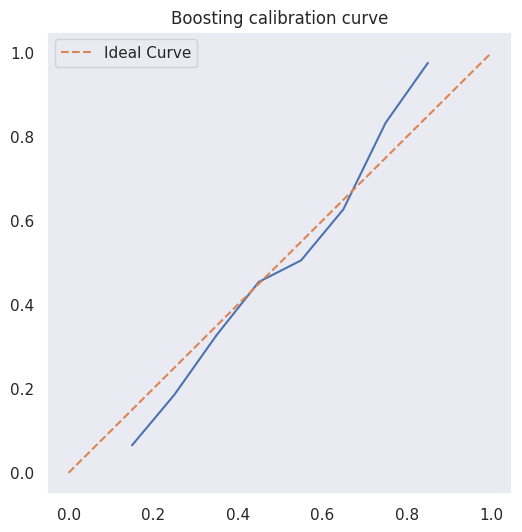

In [ ]:
args = study.best_params
boosting = Boosting(base_model_params={'max_depth': args['max_depth'],
                                       'min_samples_leaf': args['min_samples_leaf'],
                                       'min_samples_split': args['min_samples_split']},
                    n_estimators=args['n_estimators'],
                    learning_rate=args['learning_rate'],
                    subsample=args['subsample'],
                    early_stopping_rounds=args['early_stopping_rounds'])

boosting.fit(x_train, y_train, x_valid, y_valid)
probs = boosting.predict_proba(x_test)[:, 1]
plot_calibration_curve(y_test, probs)

plt.title('Boosting calibration curve');
plt.plot([0, 1], [0, 1], '--', label='Ideal Curve')
plt.legend()
plt.show()

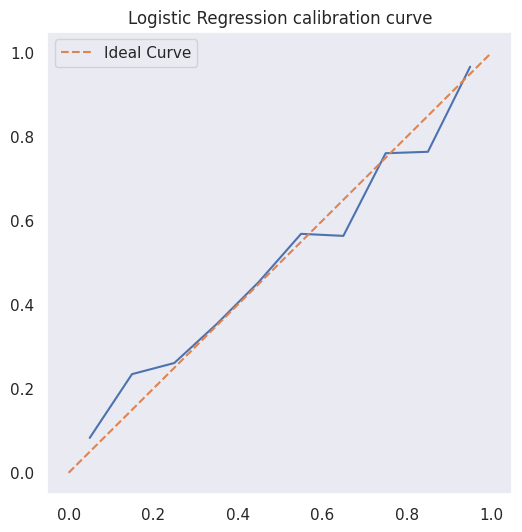

In [ ]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(penalty='l2', random_state=42).fit(x_train, y_train)
probs = model.predict_proba(x_test)[:, 1]
plot_calibration_curve(y_test, probs)

plt.title('Logistic Regression calibration curve');
plt.plot([0, 1], [0, 1], '--', label='Ideal Curve')
plt.legend()
plt.show()

**Ответ: По сравнению с логрегом получилось не так близко, но зная то что рандом стейты постоянно меняют все результаты, то бустинг выглядит лучше, почти ровная линия.**

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

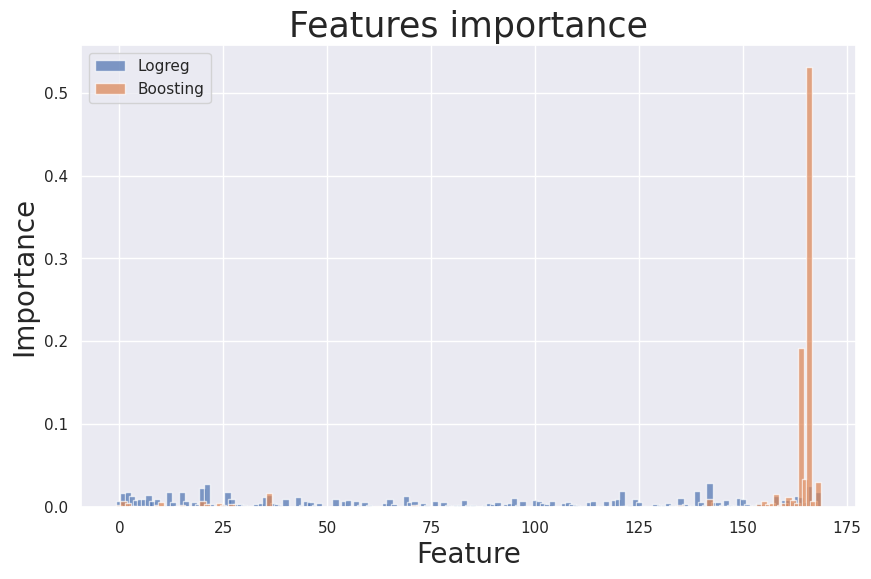

In [ ]:
logreg_imps = np.abs(model.coef_[0]) / np.abs(model.coef_[0]).sum()
boosting_imps = boosting.feature_importances_

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.set_title('Features importance', fontsize=25)
ax.set_xlabel('Feature', fontsize=20)
ax.set_ylabel('Importance', fontsize=20)

plt.bar(np.arange(len(logreg_imps)), logreg_imps, width=1.5, alpha=0.7)
plt.bar(np.arange(len(boosting_imps)), boosting_imps, width=1.5, alpha=0.7)
plt.legend(['Logreg', 'Boosting']);
plt.show()

**Ответ: У нас используются в целом деревья небольшой глубины, поэтому когда мы ищем признаки, которые хорошо бы разделяли данные, у нас часто появляются одни и те же признаки, так как они являются самыми ценными для модели, в отличие от логрега, который может распределить важность между всеми возможными признаками равномерно.**

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [ ]:
print(f'Old boosting score: {boosting.score(x_test, y_test):.4f}')

Old boosting score: 0.9374


In [ ]:
paired_imps = list(enumerate(boosting_imps))
paired_imps = list(np.array(sorted(paired_imps, key=lambda x: x[1]))[:, 0])[-10:]

clear_boosting = Boosting(base_model_params={'max_depth': args['max_depth'],
                                             'min_samples_leaf': args['min_samples_leaf'],
                                             'min_samples_split': args['min_samples_split']},
                          n_estimators=args['n_estimators'],
                          learning_rate=args['learning_rate'],
                          subsample=args['subsample'],
                          early_stopping_rounds=args['early_stopping_rounds'])

clear_boosting.fit(x_train[:, paired_imps], y_train, x_valid[:, paired_imps], y_valid)
print(f'Cleared boosting score: {clear_boosting.score(x_test[:, paired_imps], y_test):.4f}')

Cleared boosting score: 0.9306


**Ответ: Наша модель почти не потеряла в качестве (лишь на тысячные), зато вместо 170+ признаков используем только 10.**

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [ ]:
from sklearn.model_selection import KFold


cv_folder = KFold(n_splits=5, shuffle=True, random_state=42)
preds = np.zeros((x_train.shape[0], 2))
reals = np.zeros(x_train.shape[0])
i = 0

for train_ind, test_ind in cv_folder.split(x_train):
    boosting = Boosting(base_model_params={'max_depth': args['max_depth'],
                                           'min_samples_leaf': args['min_samples_leaf'],
                                           'min_samples_split': args['min_samples_split']},
                        n_estimators=args['n_estimators'],
                        learning_rate=args['learning_rate'],
                        subsample=args['subsample'],
                        early_stopping_rounds=args['early_stopping_rounds'])
    ct = x_train[test_ind].shape[0]
    boosting.fit(x_train[train_ind], y_train[train_ind], x_train[test_ind], y_train[test_ind])
    preds[ct * i : ct * (i + 1), 0] = boosting.predict_proba(x_train[test_ind])[:, 1]


    model = LogisticRegression(penalty='l2', random_state=42)
    model.fit(x_train[train_ind], y_train[train_ind])
    preds[ct * i : ct * (i + 1), 1] = model.predict_proba(x_train[test_ind])[:, 1]

    reals[ct * i : ct * (i + 1)] = y_train[test_ind]
    i += 1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score


linear = LinearRegression()
linear.fit(StandardScaler().fit_transform(preds), reals)
preds = linear.coef_[0] * boosting.predict_proba(x_test)[:, 1] + linear.coef_[1] * model.predict_proba(x_test)[:, 1]
print(f'Blended score: {roc_auc_score(y_test == 1, preds):.4f}')

Blended score: 0.9410


**Ответ: Да, стало получше.**

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(eval_metric='AUC')

params = {'max_depth': np.arange(1, 15, 2),
          'n_estimators': np.arange(50, 251, 50),
          'learning_rate': np.arange(1e-4, 1e-1, 5),
          'subsample':  np.arange(0.1, 1, 0.2),
          'early_stopping_rounds': np.arange(10, 100, 20)}

grid_search_result = catboost.grid_search(params, x_train, y_train, verbose=False)

Выходные данные были обрезаны до нескольких последних строк (5000).
64:	test: 0.9539479	best: 0.9540072 (63)	total: 2.49s	remaining: 7.1s
65:	test: 0.9538979	best: 0.9540072 (63)	total: 2.54s	remaining: 7.09s
66:	test: 0.9539874	best: 0.9540072 (63)	total: 2.6s	remaining: 7.09s
67:	test: 0.9539133	best: 0.9540072 (63)	total: 2.61s	remaining: 6.98s
68:	test: 0.9539127	best: 0.9540072 (63)	total: 2.63s	remaining: 6.9s
69:	test: 0.9539398	best: 0.9540072 (63)	total: 2.67s	remaining: 6.88s
70:	test: 0.9539688	best: 0.9540072 (63)	total: 2.72s	remaining: 6.86s
71:	test: 0.9539741	best: 0.9540072 (63)	total: 2.78s	remaining: 6.86s
72:	test: 0.9540942	best: 0.9540942 (72)	total: 2.83s	remaining: 6.85s
73:	test: 0.9540861	best: 0.9540942 (72)	total: 2.87s	remaining: 6.84s
74:	test: 0.9542156	best: 0.9542156 (74)	total: 2.93s	remaining: 6.84s
75:	test: 0.9542482	best: 0.9542482 (75)	total: 2.98s	remaining: 6.83s
76:	test: 0.9542288	best: 0.9542482 (75)	total: 3.03s	remaining: 6.81s
77:	test: 0.

In [ ]:
coeffs = grid_search_result['params']
print(coeffs)

{'depth': 13, 'od_wait': 30, 'iterations': 100, 'subsample': 0.1, 'learning_rate': 0.0001}


In [ ]:
catboost_model = CatBoostClassifier(eval_metric='AUC',
                                    l2_leaf_reg=coeffs['od_wait'],
                                    learning_rate=coeffs['learning_rate'],
                                    max_depth=coeffs['depth'],
                                    subsample=coeffs['subsample'],
                                    n_estimators=coeffs['iterations'])
catboost_model.fit(x_train, y_train, verbose=False)

print(f'Catboost score: {roc_auc_score(y_test == 1, catboost_model.predict_proba(x_test)[:, 1]):.4f}')

Catboost score: 0.9314


**Ответ: Катбуст отработал чуть получше. Но я не перебирал все возможные параметры, а у рассматриваемых довольно ограниченный диапазон значений, а то оно и так час считалось. Возможно c полным перебором или более удачными диапазонами результат был бы еще лучше.**

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2024 года?

**Социализироваться нельзя, ковид опять разносится. Поэтому наряжаем елку в Lethal Company.**

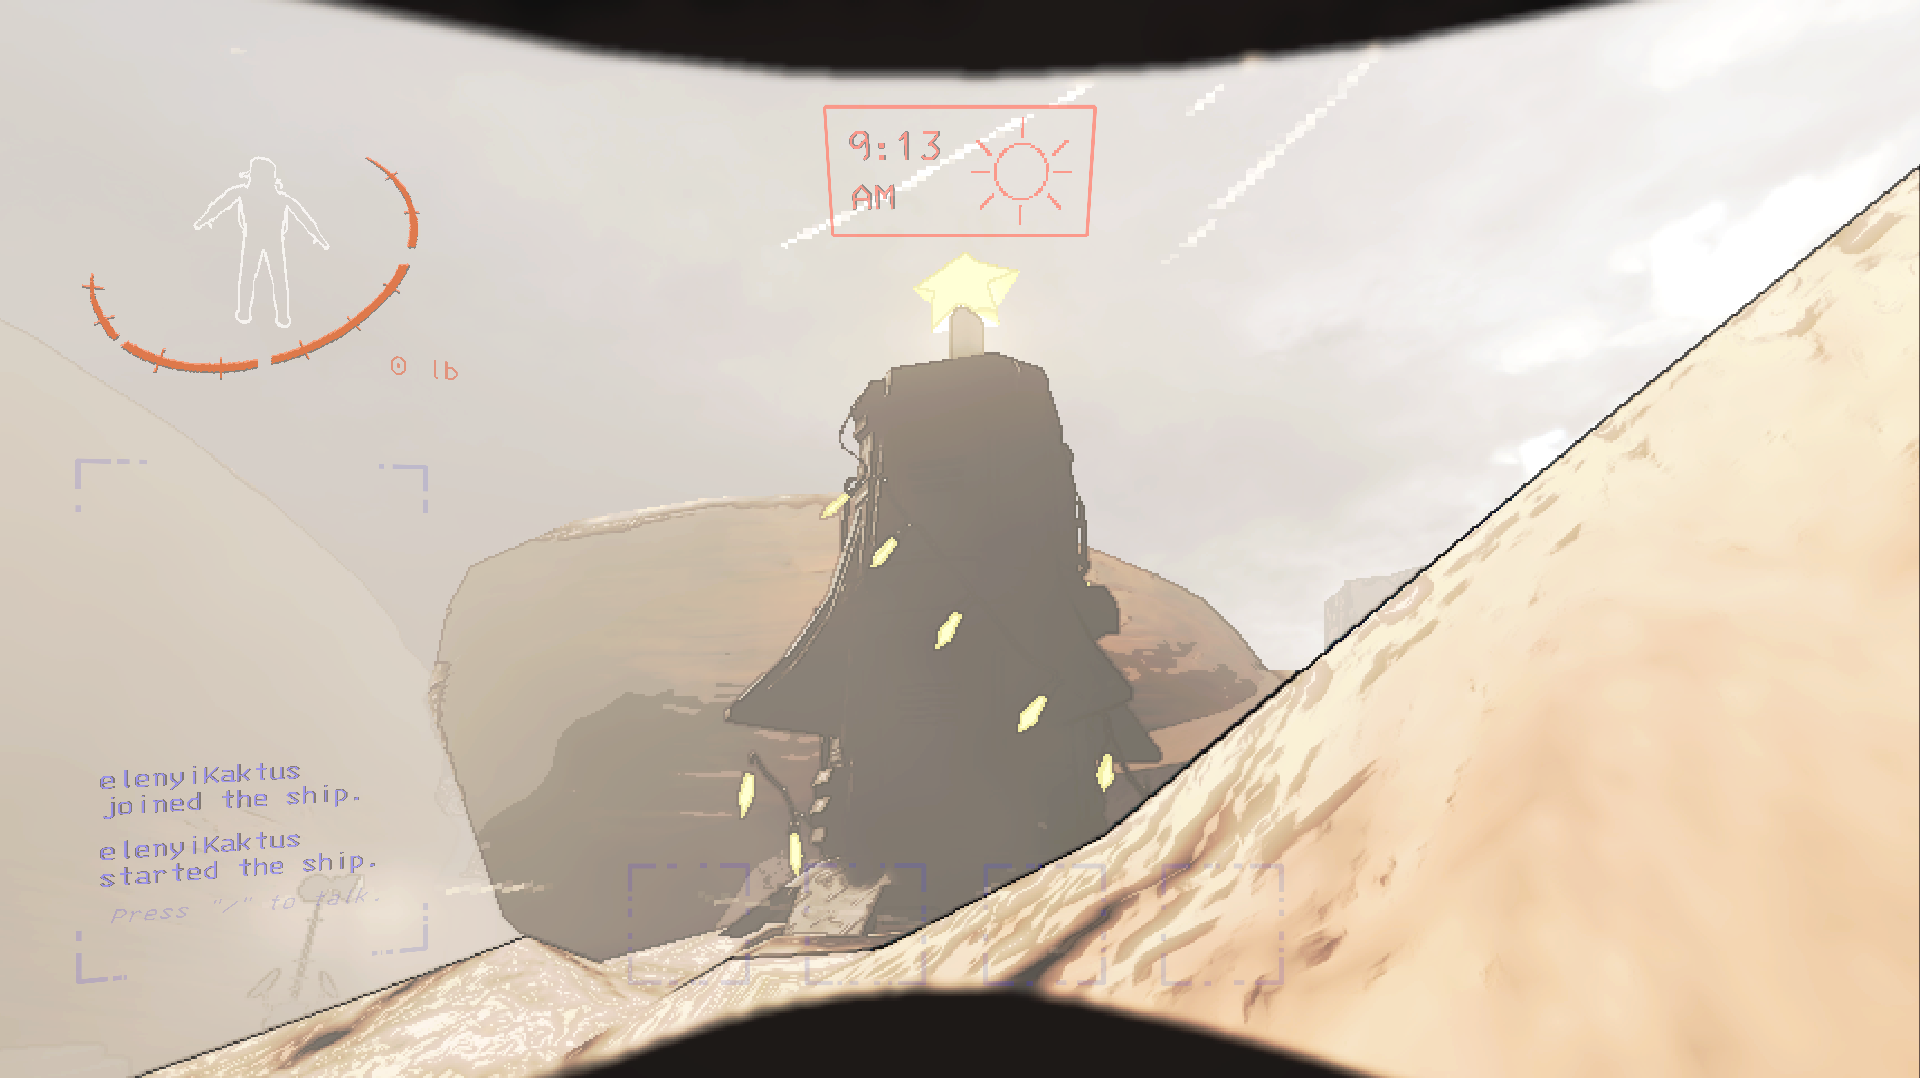